In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import seaborn as sb
from sklearn import metrics
from scipy.stats import zscore, randint
from sklearn.model_selection import train_test_split, KFold, cross_validate,cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
bond_ratings = pd.read_csv('bond_ratings.csv')
fund_allocation = pd.read_csv('fund_allocations.csv')
fund_config = pd.read_csv('fund_config.csv')
fund_ratios = pd.read_csv('fund_ratios.csv')
fund_specs = pd.read_csv('fund_specs.csv')
other_specs = pd.read_csv('other_specs.csv')
return_3year = pd.read_csv('return_3year.csv')
return_5year = pd.read_csv('return_5year.csv')
return_10year = pd.read_csv('return_10year.csv')

In [3]:
fund_specs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   investment_class   23520 non-null  object 
 1   currency           25000 non-null  object 
 2   total_assets       24881 non-null  float64
 3   yield              24873 non-null  float64
 4   greatstone_rating  20000 non-null  float64
 5   inception_date     25000 non-null  object 
 6   tag                25000 non-null  int64  
 7   fund_size          23520 non-null  object 
 8   return_ytd         24892 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.7+ MB


In [4]:
fund_specs.drop(['investment_class','currency','inception_date','fund_size'], axis = 1, inplace= True)

In [5]:
target_vals = fund_specs['greatstone_rating']

In [6]:
fund_ratios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   fund_id                        25000 non-null  object 
 1   tag                            25000 non-null  int64  
 2   fund_ratio_net_annual_expense  25000 non-null  float64
 3   pb_ratio                       24886 non-null  float64
 4   ps_ratio                       24886 non-null  object 
 5   mmc                            24886 non-null  object 
 6   pc_ratio                       24886 non-null  object 
 7   pe_ratio                       24886 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 1.5+ MB


In [7]:
fund_ratios.drop(['ps_ratio','mmc','pc_ratio','pe_ratio'], axis =1, inplace=True)

In [8]:
fund_ratios.fillna(value = fund_ratios.mean(), inplace=True)

In [9]:
fund_ratios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   fund_id                        25000 non-null  object 
 1   tag                            25000 non-null  int64  
 2   fund_ratio_net_annual_expense  25000 non-null  float64
 3   pb_ratio                       25000 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 781.4+ KB


In [10]:
# bond_ratings.info()
# bond_ratings.describe()
# bond_ratings.head(10)
# bond_ratings_tag = bond_ratings.tag
# bond_ratings.drop(['maturity_bond','duration_bond','tag','us_govt_bond_rating'], axis=1, inplace=True)
# cols = bond_ratings.columns
# cols = bond_ratings.columns
# bond_ratings = bond_ratings.abs()
# bond_ratings.info()
# bond_ratings.describe().T

# for col in cols:
#     for n in range(25000):
#         if bond_ratings[col][n]>5:
#            bond_ratings = bond_ratings.replace({bond_ratings[col][n]:np.divide(bond_ratings[col][n],10)})
#            if bond_ratings[col][n]>5:
#                 bond_ratings = bond_ratings.replace({bond_ratings[col][n]:5})

# bond_ratings.to_csv("C:\\Users\\vipul\\AIML Projects\\Practice Lab\\GL_Hackathon\\Hackathon_Files\\external\\trial.csv")
# bond_ratings.info()
# bond_ratings.describe()
# bond_ratings['Avg_rating'] = bond_ratings.mean(axis=1)
# bond_ratings.head(10)
# bond_ratings = bond_ratings.drop(['bb_rating','below_b_rating','others_rating','b_rating','a_rating','aaa_rating','aa_rating','bbb_rating'], axis = 1)
# bond_ratings['tag'] = bond_ratings_tag
# bond_ratings.head(10)

In [11]:
fund_allocation.rename(columns={'id':'tag'}, inplace=True)

In [12]:
dataSets_tag = []
dataSetsWO_tag = []
dataSets = {'bond_rat':bond_ratings,'find_conf':fund_config,'fund_ratios':fund_ratios,
            'fund_spec':fund_specs,'other_specs':other_specs,'return3':return_3year,'return5':return_5year,'return10':return_10year}
for n in dataSets:
    if 'tag' in dataSets.get(n).columns:
        dataSets_tag.append(n)
    else:
        dataSetsWO_tag.append(n)

In [13]:
for n in range(len(dataSets_tag)-1):
    if n == 0:
        dataSet_tag_merged = pd.merge(dataSets.get(dataSets_tag[n]),dataSets.get(dataSets_tag[n+1]), on ='tag')
    else:
        dataSet_tag_merged = pd.merge(dataSet_tag_merged,dataSets.get(dataSets_tag[n+1]), on ='tag')

In [14]:
#dataSet_tag_merged= dataSet_tag_merged.drop('fund_id', axis = 1, inplace =True)

In [15]:
fund_config.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   category        25000 non-null  object
 1   parent_company  25000 non-null  object
 2   fund_id         25000 non-null  object
 3   fund_name       25000 non-null  object
dtypes: object(4)
memory usage: 781.4+ KB


In [16]:
return_10year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   10years_category_r_squared            24894 non-null  float64
 1   10yrs_sharpe_ratio_fund               16416 non-null  float64
 2   10_years_alpha_fund                   16416 non-null  float64
 3   10years_fund_r_squared                16416 non-null  float64
 4   10years_fund_std                      16416 non-null  float64
 5   10yrs_sharpe_ratio_category           24894 non-null  float64
 6   10_years_beta_fund                    16416 non-null  float64
 7   10yrs_treynor_ratio_fund              16416 non-null  object 
 8   fund_id                               25000 non-null  object 
 9   10_years_return_mean_annual_category  24894 non-null  float64
 10  10yrs_treynor_ratio_category          24894 non-null  float64
 11  10_years_return

In [17]:
dataSet_id_merged = pd.merge(fund_config,return_10year,on = 'fund_id')

In [18]:
dataSet_id_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 0 to 24999
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   category                              25000 non-null  object 
 1   parent_company                        25000 non-null  object 
 2   fund_id                               25000 non-null  object 
 3   fund_name                             25000 non-null  object 
 4   10years_category_r_squared            24894 non-null  float64
 5   10yrs_sharpe_ratio_fund               16416 non-null  float64
 6   10_years_alpha_fund                   16416 non-null  float64
 7   10years_fund_r_squared                16416 non-null  float64
 8   10years_fund_std                      16416 non-null  float64
 9   10yrs_sharpe_ratio_category           24894 non-null  float64
 10  10_years_beta_fund                    16416 non-null  float64
 11  10yrs_treynor_r

In [19]:
dataSet = pd.merge(dataSet_id_merged,dataSet_tag_merged, on = 'fund_id')

In [20]:
dataSet.head()

,category,parent_company,fund_id,fund_name,10years_category_r_squared,10yrs_sharpe_ratio_fund,10_years_alpha_fund,10years_fund_r_squared,10years_fund_std,10yrs_sharpe_ratio_category,...,5_years_beta_fund,5yrs_treynor_ratio_fund,5_years_return_mean_annual_fund,5_years_return_mean_annual_category,5yrs_treynor_ratio_category,5_years_return_fund,5_years_alpha_category,5_years_beta_category,5years_category_std,5_years_return_category
0,Energy Limited Partnership,DWS,264614c6-5ac3-4146-ba26-1674b136cb40,DWS RREEF MLP & Energy Infrastructure Fund - C...,0.49,NaN,NaN,NaN,NaN,0.01,...,NaN,NaN,NaN,-0.00,-0.04,0.00,-0.11,0.01,0.20,-4.25
1,Large Growth,Janus Henderson,f5ad58c2-fdea-4087-8678-e04744f89f90,Janus Henderson Research Fund Class N,0.88,1.16,0.16,91.68,14.30,0.01,...,1.05,10.37,0.99,0.01,0.10,11.71,-0.00,0.01,0.13,11.26
2,Large Growth,Calvert Research and Management,3c13f4ab-02c4-4ca7-a133-7e996ec5d0c4,Calvert Equity Fund Class A,0.88,1.22,1.00,90.69,12.68,0.01,...,0.86,13.84,1.05,0.01,0.10,12.78,-0.00,0.01,0.13,11.26
3,Large Value,Invesco,ff78bdd8-59eb-4cef-9f3c-b1baacce9554,Invesco Diversified Dividend Fund R5 Class,0.90,1.20,0.75,89.03,11.21,0.01,...,0.69,9.3,0.62,0.01,0.07,7.25,-0.03,0.01,0.11,7.20
4,Target-Date 2035,PGIM Funds (Prudential),63d8406d-c525-494a-8e03-d4fc4cfcb571,Prudential Day One 2035 Fund Class R3,0.97,NaN,NaN,NaN,NaN,0.01,...,NaN,NaN,NaN,0.01,0.04,0.00,-0.01,0.01,0.09,5.95


In [21]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 0 to 24999
Columns: 112 entries, category to 5_years_return_category
dtypes: float64(100), int64(1), object(11)
memory usage: 21.6+ MB


In [22]:
dataSetbackUp = dataSet

In [23]:
dataSet.drop(['category','parent_company','fund_name'], axis = 1)

,fund_id,10years_category_r_squared,10yrs_sharpe_ratio_fund,10_years_alpha_fund,10years_fund_r_squared,10years_fund_std,10yrs_sharpe_ratio_category,10_years_beta_fund,10yrs_treynor_ratio_fund,10_years_return_mean_annual_category,...,5_years_beta_fund,5yrs_treynor_ratio_fund,5_years_return_mean_annual_fund,5_years_return_mean_annual_category,5yrs_treynor_ratio_category,5_years_return_fund,5_years_alpha_category,5_years_beta_category,5years_category_std,5_years_return_category
0,264614c6-5ac3-4146-ba26-1674b136cb40,0.49,NaN,NaN,NaN,NaN,0.01,NaN,NaN,0.01,...,NaN,NaN,NaN,-0.00,-0.04,0.00,-0.11,0.01,0.20,-4.25
1,f5ad58c2-fdea-4087-8678-e04744f89f90,0.88,1.16,0.16,91.68,14.30,0.01,1.08,15.57,0.01,...,1.05,10.37,0.99,0.01,0.10,11.71,-0.00,0.01,0.13,11.26
2,3c13f4ab-02c4-4ca7-a133-7e996ec5d0c4,0.88,1.22,1.00,90.69,12.68,0.01,0.95,16.58,0.01,...,0.86,13.84,1.05,0.01,0.10,12.78,-0.00,0.01,0.13,11.26
3,ff78bdd8-59eb-4cef-9f3c-b1baacce9554,0.90,1.20,0.75,89.03,11.21,0.01,0.84,16.38,0.01,...,0.69,9.3,0.62,0.01,0.07,7.25,-0.03,0.01,0.11,7.20
4,63d8406d-c525-494a-8e03-d4fc4cfcb571,0.97,NaN,NaN,NaN,NaN,0.01,NaN,NaN,0.01,...,NaN,NaN,NaN,0.01,0.04,0.00,-0.01,0.01,0.09,5.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,c3d73c76-6b0c-4ee4-b562-e9bff53e4c8c,0.90,0.90,-3.02,91.88,12.11,0.01,0.92,11.7,0.01,...,0.97,3.72,0.41,0.01,0.07,4.41,-0.03,0.01,0.11,7.20
24996,12fc8949-6563-4dd4-a7cc-0400131fa6ab,0.84,0.80,3.36,87.68,13.78,0.01,0.82,12.87,0.01,...,0.78,6.55,0.53,0.01,0.06,5.94,0.04,0.01,0.11,5.89
24997,7fe4b63a-c42e-4c2b-a59b-d29ade57ecfd,0.91,NaN,NaN,NaN,NaN,0.01,NaN,NaN,0.01,...,NaN,NaN,NaN,0.00,0.04,0.00,-0.01,0.01,0.06,3.69
24998,65421547-1407-4c50-92dc-e1cb1e9972dd,0.85,0.80,-5.58,72.16,25.01,0.01,1.67,10.86,0.01,...,1.72,3.56,0.78,0.01,0.05,6.92,-0.04,0.01,0.13,6.34


In [24]:
##Usable dataSet is dataSet. Performing EDA on the dataSet

In [25]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [26]:
dataSet.describe().T

,count,mean,std,min,25%,50%,75%,max
10years_category_r_squared,24894.0,7.315775e-01,2.736841e-01,0.00,7.100000e-01,8.400000e-01,9.200000e-01,9.700000e-01
10yrs_sharpe_ratio_fund,16416.0,9.374945e-01,3.422704e-01,-6.58,8.000000e-01,9.600000e-01,1.120000e+00,3.010000e+00
10_years_alpha_fund,16416.0,-3.147539e-03,3.275580e+00,-25.97,-1.740000e+00,-3.000000e-01,1.280000e+00,1.486000e+01
10years_fund_r_squared,16416.0,7.660279e+01,2.569918e+01,0.00,7.252000e+01,8.608000e+01,9.377000e+01,1.000000e+02
10years_fund_std,16416.0,1.141863e+01,5.937141e+00,0.20,6.140000e+00,1.274000e+01,1.562000e+01,5.229000e+01
10yrs_sharpe_ratio_category,24894.0,9.510725e-03,2.253745e-03,-0.01,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02
10_years_beta_fund,16416.0,9.632219e-01,1.582636e+00,-88.06,8.600000e-01,1.010000e+00,1.130000e+00,4.929000e+01
10_years_return_mean_annual_category,24894.0,7.680967e-03,4.513989e-03,-0.02,1.000000e-02,1.000000e-02,1.000000e-02,2.000000e-02
10yrs_treynor_ratio_category,24894.0,1.388387e-01,4.425536e-01,-0.19,7.000000e-02,1.000000e-01,1.400000e-01,4.680000e+00
10_years_return_fund,24885.0,6.620979e+00,6.537417e+00,-38.56,0.000000e+00,5.900000e+00,1.238000e+01,4.066000e+01


In [27]:
dataSet.head(5)

,category,parent_company,fund_id,fund_name,10years_category_r_squared,10yrs_sharpe_ratio_fund,10_years_alpha_fund,10years_fund_r_squared,10years_fund_std,10yrs_sharpe_ratio_category,...,5_years_beta_fund,5yrs_treynor_ratio_fund,5_years_return_mean_annual_fund,5_years_return_mean_annual_category,5yrs_treynor_ratio_category,5_years_return_fund,5_years_alpha_category,5_years_beta_category,5years_category_std,5_years_return_category
0,Energy Limited Partnership,DWS,264614c6-5ac3-4146-ba26-1674b136cb40,DWS RREEF MLP & Energy Infrastructure Fund - C...,0.49,NaN,NaN,NaN,NaN,0.01,...,NaN,NaN,NaN,-0.00,-0.04,0.00,-0.11,0.01,0.20,-4.25
1,Large Growth,Janus Henderson,f5ad58c2-fdea-4087-8678-e04744f89f90,Janus Henderson Research Fund Class N,0.88,1.16,0.16,91.68,14.30,0.01,...,1.05,10.37,0.99,0.01,0.10,11.71,-0.00,0.01,0.13,11.26
2,Large Growth,Calvert Research and Management,3c13f4ab-02c4-4ca7-a133-7e996ec5d0c4,Calvert Equity Fund Class A,0.88,1.22,1.00,90.69,12.68,0.01,...,0.86,13.84,1.05,0.01,0.10,12.78,-0.00,0.01,0.13,11.26
3,Large Value,Invesco,ff78bdd8-59eb-4cef-9f3c-b1baacce9554,Invesco Diversified Dividend Fund R5 Class,0.90,1.20,0.75,89.03,11.21,0.01,...,0.69,9.3,0.62,0.01,0.07,7.25,-0.03,0.01,0.11,7.20
4,Target-Date 2035,PGIM Funds (Prudential),63d8406d-c525-494a-8e03-d4fc4cfcb571,Prudential Day One 2035 Fund Class R3,0.97,NaN,NaN,NaN,NaN,0.01,...,NaN,NaN,NaN,0.01,0.04,0.00,-0.01,0.01,0.09,5.95


In [28]:
#dataSet.dropna(inplace=True)

In [29]:
dataSet.shape

(25000, 112)

In [30]:
dataSet.head()

,category,parent_company,fund_id,fund_name,10years_category_r_squared,10yrs_sharpe_ratio_fund,10_years_alpha_fund,10years_fund_r_squared,10years_fund_std,10yrs_sharpe_ratio_category,...,5_years_beta_fund,5yrs_treynor_ratio_fund,5_years_return_mean_annual_fund,5_years_return_mean_annual_category,5yrs_treynor_ratio_category,5_years_return_fund,5_years_alpha_category,5_years_beta_category,5years_category_std,5_years_return_category
0,Energy Limited Partnership,DWS,264614c6-5ac3-4146-ba26-1674b136cb40,DWS RREEF MLP & Energy Infrastructure Fund - C...,0.49,NaN,NaN,NaN,NaN,0.01,...,NaN,NaN,NaN,-0.00,-0.04,0.00,-0.11,0.01,0.20,-4.25
1,Large Growth,Janus Henderson,f5ad58c2-fdea-4087-8678-e04744f89f90,Janus Henderson Research Fund Class N,0.88,1.16,0.16,91.68,14.30,0.01,...,1.05,10.37,0.99,0.01,0.10,11.71,-0.00,0.01,0.13,11.26
2,Large Growth,Calvert Research and Management,3c13f4ab-02c4-4ca7-a133-7e996ec5d0c4,Calvert Equity Fund Class A,0.88,1.22,1.00,90.69,12.68,0.01,...,0.86,13.84,1.05,0.01,0.10,12.78,-0.00,0.01,0.13,11.26
3,Large Value,Invesco,ff78bdd8-59eb-4cef-9f3c-b1baacce9554,Invesco Diversified Dividend Fund R5 Class,0.90,1.20,0.75,89.03,11.21,0.01,...,0.69,9.3,0.62,0.01,0.07,7.25,-0.03,0.01,0.11,7.20
4,Target-Date 2035,PGIM Funds (Prudential),63d8406d-c525-494a-8e03-d4fc4cfcb571,Prudential Day One 2035 Fund Class R3,0.97,NaN,NaN,NaN,NaN,0.01,...,NaN,NaN,NaN,0.01,0.04,0.00,-0.01,0.01,0.09,5.95


In [31]:
dataSet.drop(['category','parent_company','fund_name'], axis = 1, inplace = True)

In [32]:
cols = dataSet.columns
for col in cols:
    if dataSet[col].dtypes == 'O' and col != 'fund_id' and col != 'tag':
        print (col)
        dataSet[col].apply(pd.to_numeric, errors='coerce')
        print (dataSet[col].dtype)

10yrs_treynor_ratio_fund
object
pc_ratio
object
pe_ratio
object
mmc
object
ps_ratio
object
3yrs_treynor_ratio_fund
object
5yrs_treynor_ratio_fund
object


In [33]:
dataSet.drop(['greatstone_rating_y','tag'], axis=1, inplace=True)

In [34]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 0 to 24999
Columns: 107 entries, fund_id to 5_years_return_category
dtypes: float64(99), object(8)
memory usage: 20.6+ MB


In [35]:
dataSet.to_csv("C:\\Users\\vipul\\AIML Projects\\Practice Lab\\GL_Hackathon\\Hackathon_Files\\external\\all_data.csv")

In [36]:
dataSet.dtypes

fund_id                                  object
10years_category_r_squared              float64
10yrs_sharpe_ratio_fund                 float64
10_years_alpha_fund                     float64
10years_fund_r_squared                  float64
10years_fund_std                        float64
10yrs_sharpe_ratio_category             float64
10_years_beta_fund                      float64
10yrs_treynor_ratio_fund                 object
10_years_return_mean_annual_category    float64
10yrs_treynor_ratio_category            float64
10_years_return_fund                    float64
10_years_alpha_category                 float64
10_years_beta_category                  float64
10years_category_std                    float64
10_years_return_mean_annual_fund        float64
10_years_return_category                float64
bb_rating                               float64
us_govt_bond_rating                     float64
below_b_rating                          float64
others_rating                           

In [37]:
dataSet['5yrs_treynor_ratio_fund'] = dataSet['5yrs_treynor_ratio_fund'].str.replace(",","").astype(float)

In [38]:
dataSet['5yrs_treynor_ratio_fund']=dataSet['5yrs_treynor_ratio_fund'].astype(float)

In [39]:
dataSet['5yrs_treynor_ratio_fund'].dtype

dtype('float64')

In [40]:
dataSet['ps_ratio'] = dataSet['ps_ratio'].str.replace(",","").astype(float)

In [41]:
dataSet['ps_ratio'] = dataSet['ps_ratio'].astype(float)

In [42]:
dataSet['3yrs_treynor_ratio_fund'] = dataSet['3yrs_treynor_ratio_fund'].str.replace(",","").astype(float)

In [43]:
dataSet['3yrs_treynor_ratio_fund'] = dataSet['3yrs_treynor_ratio_fund'].astype(float)

In [44]:
dataSet['10yrs_treynor_ratio_fund'] = dataSet['10yrs_treynor_ratio_fund'].str.replace(",","").astype(float)

In [45]:
dataSet['mmc'] = dataSet['mmc'].str.replace(",","").astype(float)

In [46]:
dataSet['pc_ratio'] = dataSet['pc_ratio'].str.replace(",","").astype(float)

In [47]:
dataSet['pe_ratio'] = dataSet['pe_ratio'].str.replace(",","").astype(float)

In [48]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 0 to 24999
Columns: 107 entries, fund_id to 5_years_return_category
dtypes: float64(106), object(1)
memory usage: 20.6+ MB


In [49]:
dataSet_EDA_analysis = dataSet.copy()

In [50]:
dataSet_EDA_analysis.drop('fund_id',axis =1, inplace=True)

In [51]:
dataSet_EDA_analysis.head()

,10years_category_r_squared,10yrs_sharpe_ratio_fund,10_years_alpha_fund,10years_fund_r_squared,10years_fund_std,10yrs_sharpe_ratio_category,10_years_beta_fund,10yrs_treynor_ratio_fund,10_years_return_mean_annual_category,10yrs_treynor_ratio_category,...,5_years_beta_fund,5yrs_treynor_ratio_fund,5_years_return_mean_annual_fund,5_years_return_mean_annual_category,5yrs_treynor_ratio_category,5_years_return_fund,5_years_alpha_category,5_years_beta_category,5years_category_std,5_years_return_category
0,0.49,NaN,NaN,NaN,NaN,0.01,NaN,NaN,0.01,0.21,...,NaN,NaN,NaN,-0.00,-0.04,0.00,-0.11,0.01,0.20,-4.25
1,0.88,1.16,0.16,91.68,14.30,0.01,1.08,15.57,0.01,0.15,...,1.05,10.37,0.99,0.01,0.10,11.71,-0.00,0.01,0.13,11.26
2,0.88,1.22,1.00,90.69,12.68,0.01,0.95,16.58,0.01,0.15,...,0.86,13.84,1.05,0.01,0.10,12.78,-0.00,0.01,0.13,11.26
3,0.90,1.20,0.75,89.03,11.21,0.01,0.84,16.38,0.01,0.14,...,0.69,9.30,0.62,0.01,0.07,7.25,-0.03,0.01,0.11,7.20
4,0.97,NaN,NaN,NaN,NaN,0.01,NaN,NaN,0.01,0.08,...,NaN,NaN,NaN,0.01,0.04,0.00,-0.01,0.01,0.09,5.95


In [52]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 0 to 24999
Columns: 107 entries, fund_id to 5_years_return_category
dtypes: float64(106), object(1)
memory usage: 20.6+ MB


In [53]:
cols = dataSet_EDA_analysis.columns

In [54]:
dataSet_EDA_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 0 to 24999
Columns: 106 entries, 10years_category_r_squared to 5_years_return_category
dtypes: float64(106)
memory usage: 20.4 MB


In [55]:
# mp.figure(figsize=(30,30))
# for i in range(1,len(dataSet_EDA_analysis.columns)+1):
#     mp.subplot(14,8,i)
#     mp.tight_layout(pad=3.0)
#     sb.distplot(dataSet_EDA_analysis[cols[i-1]])
# mp.show

In [56]:
dataSet.rename(columns = {'greatstone_rating_x':'greatstone_rating'}, inplace=True)

In [57]:
#dataSet.pe_ratio

In [58]:
dataSet.mean()

10years_category_r_squared              7.315775e-01
10yrs_sharpe_ratio_fund                 9.374945e-01
10_years_alpha_fund                    -3.147539e-03
10years_fund_r_squared                  7.660279e+01
10years_fund_std                        1.141863e+01
10yrs_sharpe_ratio_category             9.510725e-03
10_years_beta_fund                      9.632219e-01
10yrs_treynor_ratio_fund                1.029826e+01
10_years_return_mean_annual_category    7.680967e-03
10yrs_treynor_ratio_category            1.388387e-01
10_years_return_fund                    6.620979e+00
10_years_alpha_category                 1.135615e-03
10_years_beta_category                  9.075681e-03
10years_category_std                    1.093987e-01
10_years_return_mean_annual_fund        8.585788e-01
10_years_return_category                9.679289e+00
bb_rating                               3.473804e+00
us_govt_bond_rating                     0.000000e+00
below_b_rating                          8.2752

In [59]:
dataSet.fillna(dataSet.mean(),inplace = True)

In [60]:
dataSet.head(10)

,fund_id,10years_category_r_squared,10yrs_sharpe_ratio_fund,10_years_alpha_fund,10years_fund_r_squared,10years_fund_std,10yrs_sharpe_ratio_category,10_years_beta_fund,10yrs_treynor_ratio_fund,10_years_return_mean_annual_category,...,5_years_beta_fund,5yrs_treynor_ratio_fund,5_years_return_mean_annual_fund,5_years_return_mean_annual_category,5yrs_treynor_ratio_category,5_years_return_fund,5_years_alpha_category,5_years_beta_category,5years_category_std,5_years_return_category
0,264614c6-5ac3-4146-ba26-1674b136cb40,0.49,0.937495,-0.003148,76.602789,11.418634,0.01,0.963222,10.298257,0.01,...,0.897861,4.238711,0.437478,-0.00,-0.04,0.00,-0.11,0.01,0.20,-4.25
1,f5ad58c2-fdea-4087-8678-e04744f89f90,0.88,1.160000,0.160000,91.680000,14.300000,0.01,1.080000,15.570000,0.01,...,1.050000,10.370000,0.990000,0.01,0.10,11.71,-0.00,0.01,0.13,11.26
2,3c13f4ab-02c4-4ca7-a133-7e996ec5d0c4,0.88,1.220000,1.000000,90.690000,12.680000,0.01,0.950000,16.580000,0.01,...,0.860000,13.840000,1.050000,0.01,0.10,12.78,-0.00,0.01,0.13,11.26
3,ff78bdd8-59eb-4cef-9f3c-b1baacce9554,0.90,1.200000,0.750000,89.030000,11.210000,0.01,0.840000,16.380000,0.01,...,0.690000,9.300000,0.620000,0.01,0.07,7.25,-0.03,0.01,0.11,7.20
4,63d8406d-c525-494a-8e03-d4fc4cfcb571,0.97,0.937495,-0.003148,76.602789,11.418634,0.01,0.963222,10.298257,0.01,...,0.897861,4.238711,0.437478,0.01,0.04,0.00,-0.01,0.01,0.09,5.95
5,090afb4d-eca3-4f69-8275-a140a0b40292,0.83,0.960000,-0.650000,84.190000,10.840000,0.01,1.220000,8.440000,0.01,...,1.460000,3.330000,0.510000,0.01,0.04,5.65,-0.00,0.01,0.09,5.89
6,17421c06-1ed9-4a00-b88b-91dcf9e0dc77,0.63,0.650000,-0.880000,53.840000,5.390000,0.01,0.490000,7.080000,0.00,...,0.250000,3.320000,0.140000,0.00,0.02,1.64,-0.01,0.00,0.05,1.36
7,08702e4f-c5bb-4f0a-b63b-f9e4a0eb2425,0.90,0.937495,-0.003148,76.602789,11.418634,0.01,0.963222,10.298257,0.01,...,0.897861,4.238711,0.437478,0.01,0.07,0.00,-0.03,0.01,0.11,7.20
8,40989717-745e-422c-a761-9695cb9989a8,0.93,0.080000,-1.010000,93.740000,18.020000,0.01,0.910000,-0.230000,0.01,...,0.920000,3.960000,0.380000,0.00,-0.00,3.75,-0.02,0.01,0.12,0.62
9,bcd0ba02-c92f-4d50-803c-1b9a9311ccfb,0.81,1.190000,1.760000,77.750000,8.330000,0.01,0.900000,11.140000,0.01,...,0.440000,6.690000,0.310000,0.00,0.04,3.77,-0.00,0.00,0.04,2.81


# -----------------------------------------------------------------------------------------------------------
Handling testdata removal and remerging with actual database.

# -----------------------------------------------------------------------------------------------------------

In [61]:
dataSet.shape

(25000, 107)

In [62]:
X_values = dataSet.drop(['greatstone_rating','fund_id','us_govt_bond_rating'], axis =1)
#Y_values = dataSet['greatstone_rating']

In [63]:
#test_data_df.to_csv("C:\\Users\\vipul\\AIML Projects\\Practice Lab\\GL_Hackathon\\Hackathon_Files\\external\\test_all_data.csv")

In [64]:
X_values.head(10)

,10years_category_r_squared,10yrs_sharpe_ratio_fund,10_years_alpha_fund,10years_fund_r_squared,10years_fund_std,10yrs_sharpe_ratio_category,10_years_beta_fund,10yrs_treynor_ratio_fund,10_years_return_mean_annual_category,10yrs_treynor_ratio_category,...,5_years_beta_fund,5yrs_treynor_ratio_fund,5_years_return_mean_annual_fund,5_years_return_mean_annual_category,5yrs_treynor_ratio_category,5_years_return_fund,5_years_alpha_category,5_years_beta_category,5years_category_std,5_years_return_category
0,0.49,0.937495,-0.003148,76.602789,11.418634,0.01,0.963222,10.298257,0.01,0.21,...,0.897861,4.238711,0.437478,-0.00,-0.04,0.00,-0.11,0.01,0.20,-4.25
1,0.88,1.160000,0.160000,91.680000,14.300000,0.01,1.080000,15.570000,0.01,0.15,...,1.050000,10.370000,0.990000,0.01,0.10,11.71,-0.00,0.01,0.13,11.26
2,0.88,1.220000,1.000000,90.690000,12.680000,0.01,0.950000,16.580000,0.01,0.15,...,0.860000,13.840000,1.050000,0.01,0.10,12.78,-0.00,0.01,0.13,11.26
3,0.90,1.200000,0.750000,89.030000,11.210000,0.01,0.840000,16.380000,0.01,0.14,...,0.690000,9.300000,0.620000,0.01,0.07,7.25,-0.03,0.01,0.11,7.20
4,0.97,0.937495,-0.003148,76.602789,11.418634,0.01,0.963222,10.298257,0.01,0.08,...,0.897861,4.238711,0.437478,0.01,0.04,0.00,-0.01,0.01,0.09,5.95
5,0.83,0.960000,-0.650000,84.190000,10.840000,0.01,1.220000,8.440000,0.01,0.09,...,1.460000,3.330000,0.510000,0.01,0.04,5.65,-0.00,0.01,0.09,5.89
6,0.63,0.650000,-0.880000,53.840000,5.390000,0.01,0.490000,7.080000,0.00,0.06,...,0.250000,3.320000,0.140000,0.00,0.02,1.64,-0.01,0.00,0.05,1.36
7,0.90,0.937495,-0.003148,76.602789,11.418634,0.01,0.963222,10.298257,0.01,0.14,...,0.897861,4.238711,0.437478,0.01,0.07,0.00,-0.03,0.01,0.11,7.20
8,0.93,0.080000,-1.010000,93.740000,18.020000,0.01,0.910000,-0.230000,0.01,0.08,...,0.920000,3.960000,0.380000,0.00,-0.00,3.75,-0.02,0.01,0.12,0.62
9,0.81,1.190000,1.760000,77.750000,8.330000,0.01,0.900000,11.140000,0.01,-0.14,...,0.440000,6.690000,0.310000,0.00,0.04,3.77,-0.00,0.00,0.04,2.81


In [65]:
X_values_scaled = X_values.apply(zscore)
#X_values_scaled = X_values

In [66]:
#X_values_scaled= X_values_scaled.reset_index()

In [67]:
X_values_scaled.head(10)

,10years_category_r_squared,10yrs_sharpe_ratio_fund,10_years_alpha_fund,10years_fund_r_squared,10years_fund_std,10yrs_sharpe_ratio_category,10_years_beta_fund,10yrs_treynor_ratio_fund,10_years_return_mean_annual_category,10yrs_treynor_ratio_category,...,5_years_beta_fund,5yrs_treynor_ratio_fund,5_years_return_mean_annual_fund,5_years_return_mean_annual_category,5yrs_treynor_ratio_category,5_years_return_fund,5_years_alpha_category,5_years_beta_category,5years_category_std,5_years_return_category
0,-0.884582,-4.003045e-16,-1.879012e-17,0.000000,0.000000,0.21756,0.000000,0.000000,0.514846,0.161142,...,-1.879281e-16,3.657189e-17,3.536665e-16,-0.770071,-1.828408,-0.986893,-3.865221,0.347165,2.158871,-2.648072
1,0.543477,8.022707e-01,6.146698e-02,0.724021,0.598922,0.21756,0.091061,0.045959,0.514846,0.025274,...,2.575262e-01,2.524637e-01,1.760082e+00,1.207049,1.333001,1.821475,0.308098,0.347165,0.744557,1.911734
2,0.543477,1.018608e+00,3.779429e-01,0.676481,0.262188,0.21756,-0.010310,0.054764,0.514846,0.025274,...,-6.408793e-02,3.953454e-01,1.951215e+00,1.207049,1.333001,2.078089,0.308098,0.347165,0.744557,1.911734
3,0.616711,9.464956e-01,2.837536e-01,0.596766,-0.043367,0.21756,-0.096085,0.053021,0.514846,0.002630,...,-3.518480e-01,2.084051e-01,5.814308e-01,1.207049,0.655556,0.751849,-0.830080,0.347165,0.340467,0.718129
4,0.873030,-4.003045e-16,-1.879012e-17,0.000000,0.000000,0.21756,0.000000,0.000000,0.514846,-0.133238,...,-1.879281e-16,3.657189e-17,3.536665e-16,1.207049,-0.021888,-0.986893,-0.071294,0.347165,-0.063623,0.350640
5,0.360393,8.114626e-02,-2.437062e-01,0.364345,-0.120275,0.21756,0.200229,-0.016200,0.514846,-0.110593,...,9.515357e-01,-3.741734e-02,2.310209e-01,1.207049,-0.021888,0.368127,0.308098,0.347165,-0.063623,0.333001
6,-0.371945,-1.036597e+00,-3.303603e-01,-1.093090,-1.253116,0.21756,-0.369006,-0.028057,-1.705245,-0.178527,...,-1.096639e+00,-3.782911e-02,-9.476307e-01,-0.770071,-0.473518,-0.593578,-0.071294,-2.150620,-0.871803,-0.998780
7,0.616711,-4.003045e-16,-1.879012e-17,0.000000,0.000000,0.21756,0.000000,0.000000,0.514846,0.002630,...,-1.879281e-16,3.657189e-17,3.536665e-16,1.207049,0.655556,-0.986893,-0.830080,0.347165,0.340467,0.718129
8,0.726562,-3.091801e+00,-3.793388e-01,0.822944,1.372164,0.21756,-0.041501,-0.091785,0.514846,-0.133238,...,3.747443e-02,-1.147629e-02,-1.830999e-01,-0.770071,-0.925148,-0.087544,-0.450687,0.347165,0.542512,-1.216334
9,0.287159,9.104393e-01,6.642783e-01,0.055090,-0.642005,0.21756,-0.049299,0.007338,0.514846,-0.631420,...,-7.750245e-01,1.009350e-01,-4.060881e-01,-0.770071,-0.021888,-0.082747,0.308098,-2.150620,-1.073848,-0.572493


In [68]:
colsX = X_values_scaled.columns

In [69]:
#Treating the outliers using the IQR method:
Q1 = X_values_scaled.quantile(0.25)
Q3 = X_values_scaled.quantile(0.75)
IQR = Q3 - Q1

print ("IQR of the dataSet is: \n")
print (IQR)

IQR of the dataSet is: 

10years_category_r_squared              0.768955
10yrs_sharpe_ratio_fund                 0.468731
10_years_alpha_fund                     0.448341
10years_fund_r_squared                  0.659673
10years_fund_std                        0.907312
10yrs_sharpe_ratio_category             0.000000
10_years_beta_fund                      0.077977
10yrs_treynor_ratio_fund                0.031646
10_years_return_mean_annual_category    0.000000
10yrs_treynor_ratio_category            0.158513
10_years_return_fund                    1.895057
10_years_alpha_category                 1.081648
10_years_beta_category                  0.000000
10years_category_std                    1.633873
10_years_return_mean_annual_fund        0.833498
10_years_return_category                1.562572
bb_rating                               0.316401
below_b_rating                          0.048259
others_rating                           0.056774
maturity_bond                           0.00

<function matplotlib.pyplot.show(*args, **kw)>

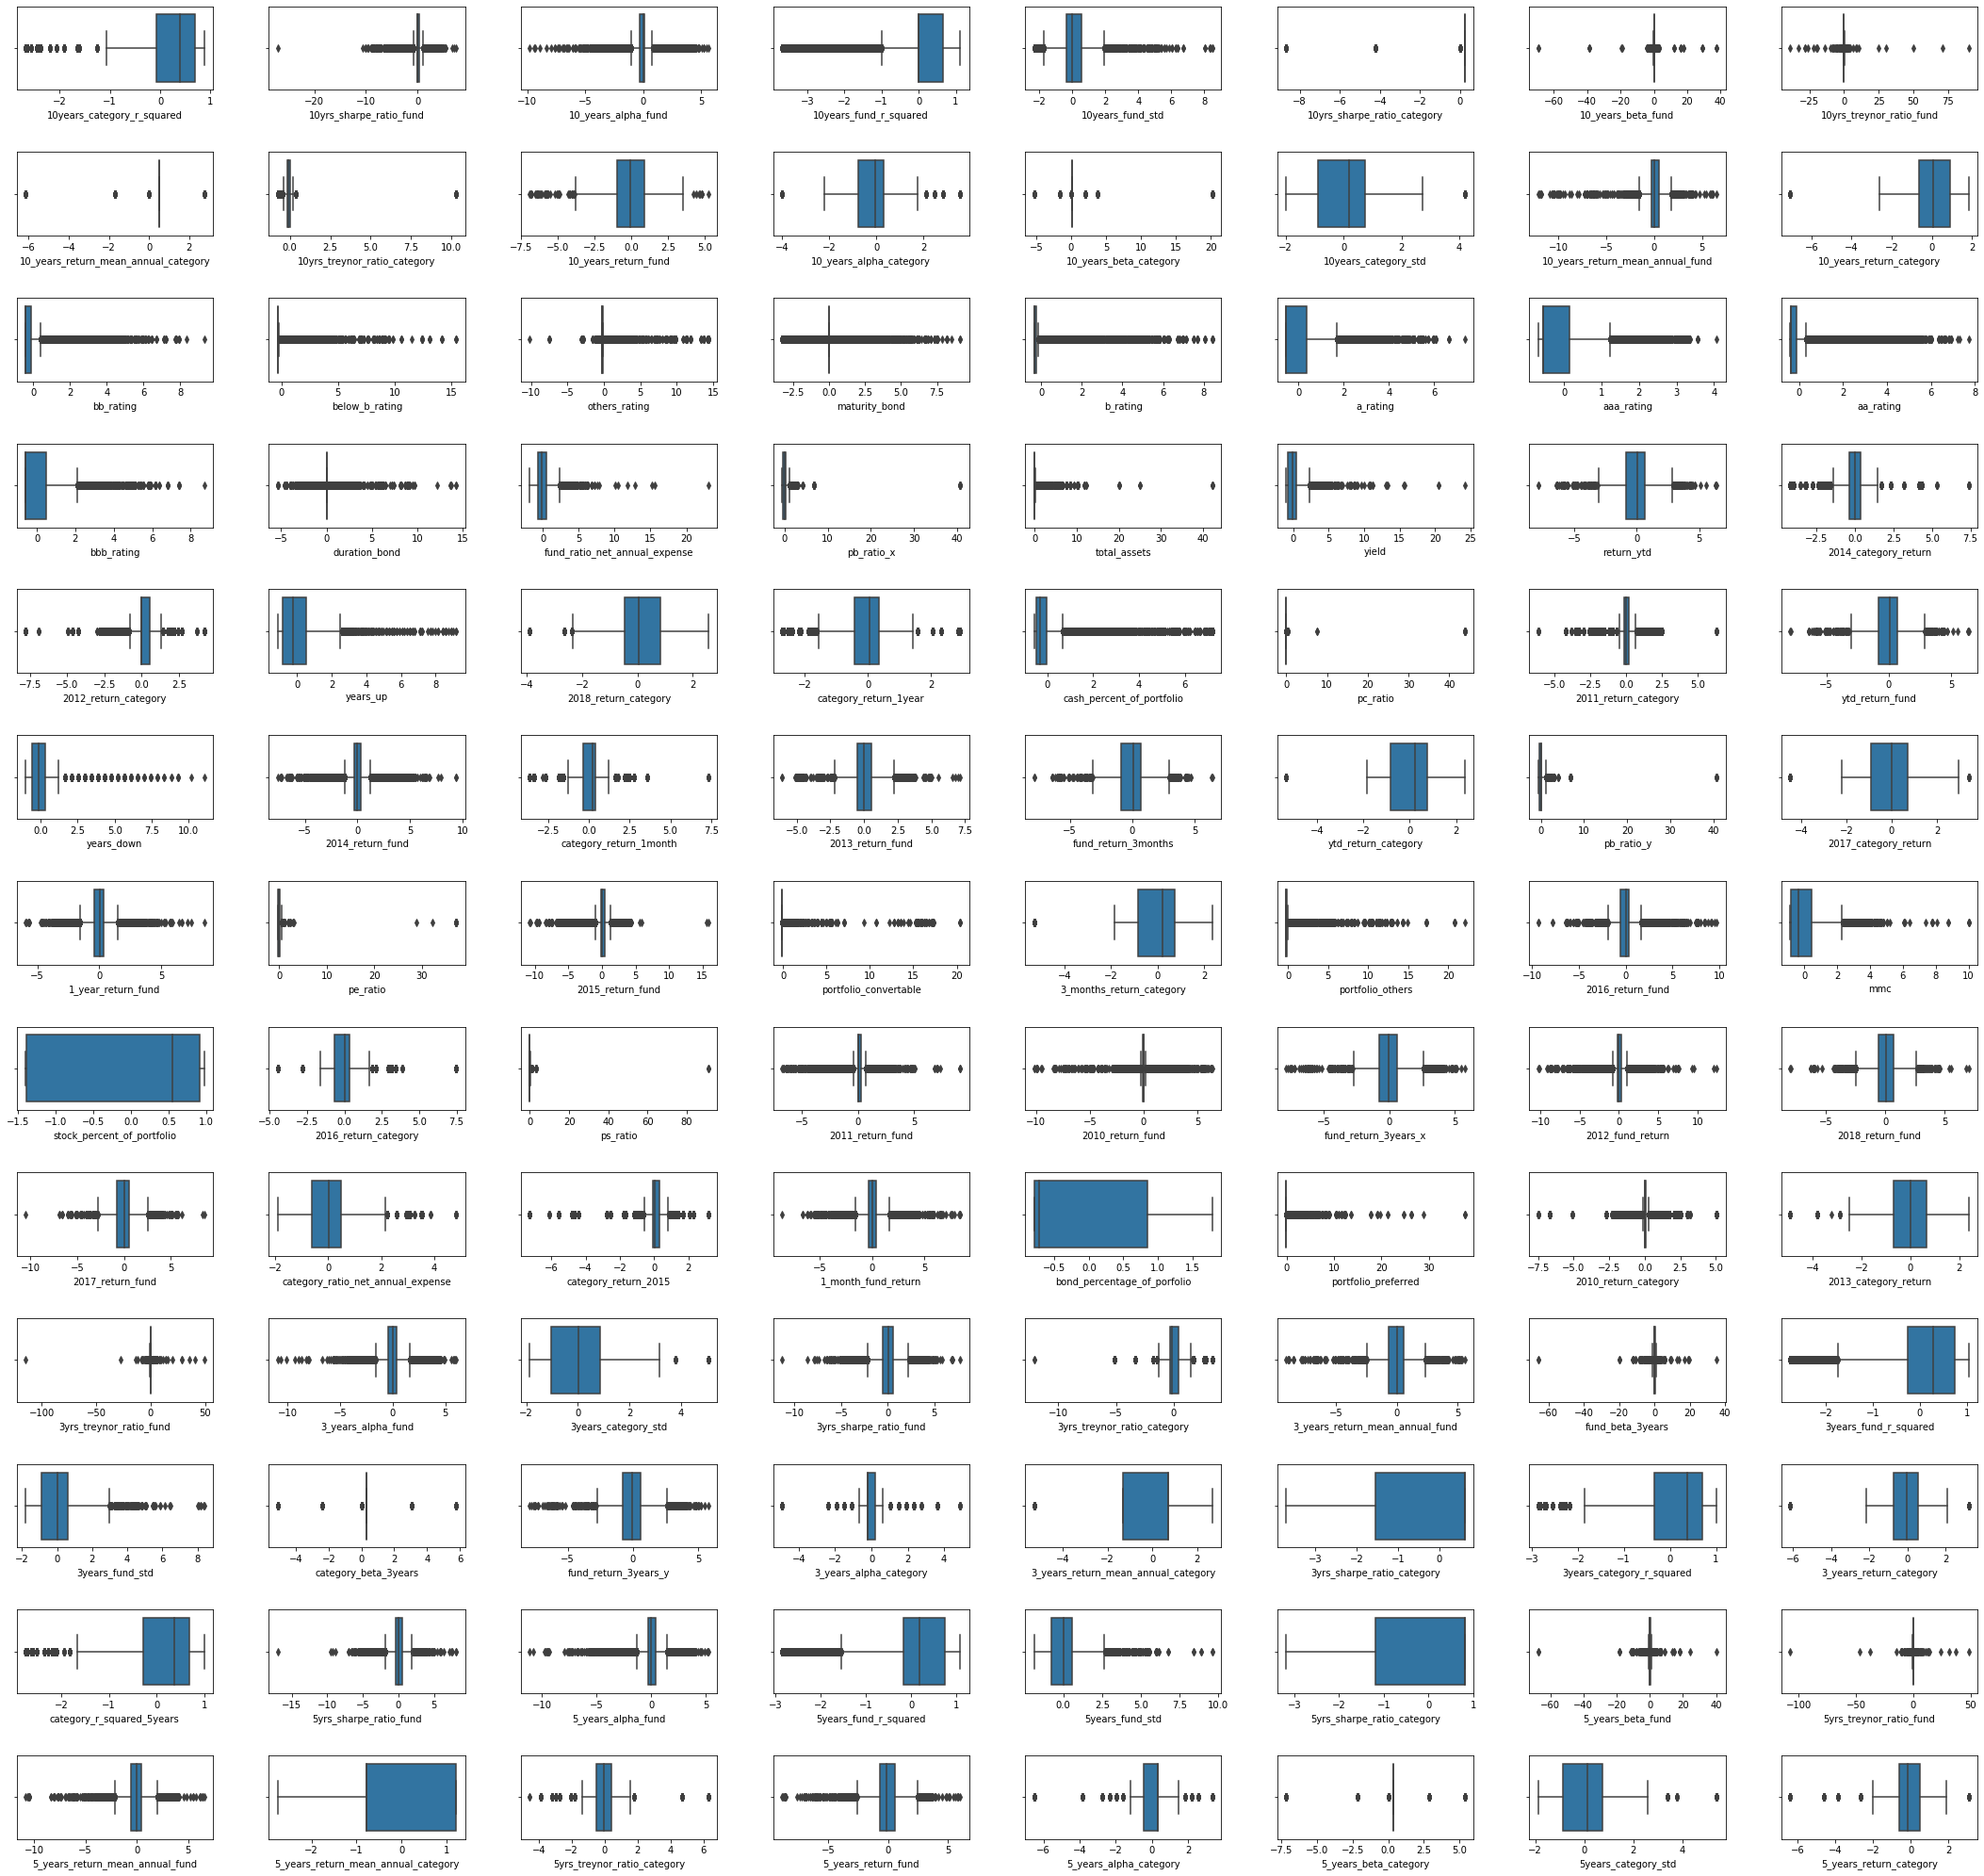

In [70]:
mp.figure(figsize=(30,30))
for i in range(1,len(X_values_scaled.columns)+1):
    mp.subplot(14,8,i)
    mp.tight_layout(pad=3.0)
    sb.boxplot(X_values_scaled[colsX[i-1]])
mp.show

In [71]:
dataWithOutliers = colsX
for attr in dataWithOutliers:
       for n in range(0,len(X_values_scaled[attr])): 
             if X_values_scaled[attr][n] < (Q1[attr]-1.5*IQR[attr]) or X_values_scaled[attr][n] > (Q3[attr]+1.5*IQR[attr]):
                X_values_scaled[attr][n] = X_values_scaled[attr].mean()

<function matplotlib.pyplot.show(*args, **kw)>

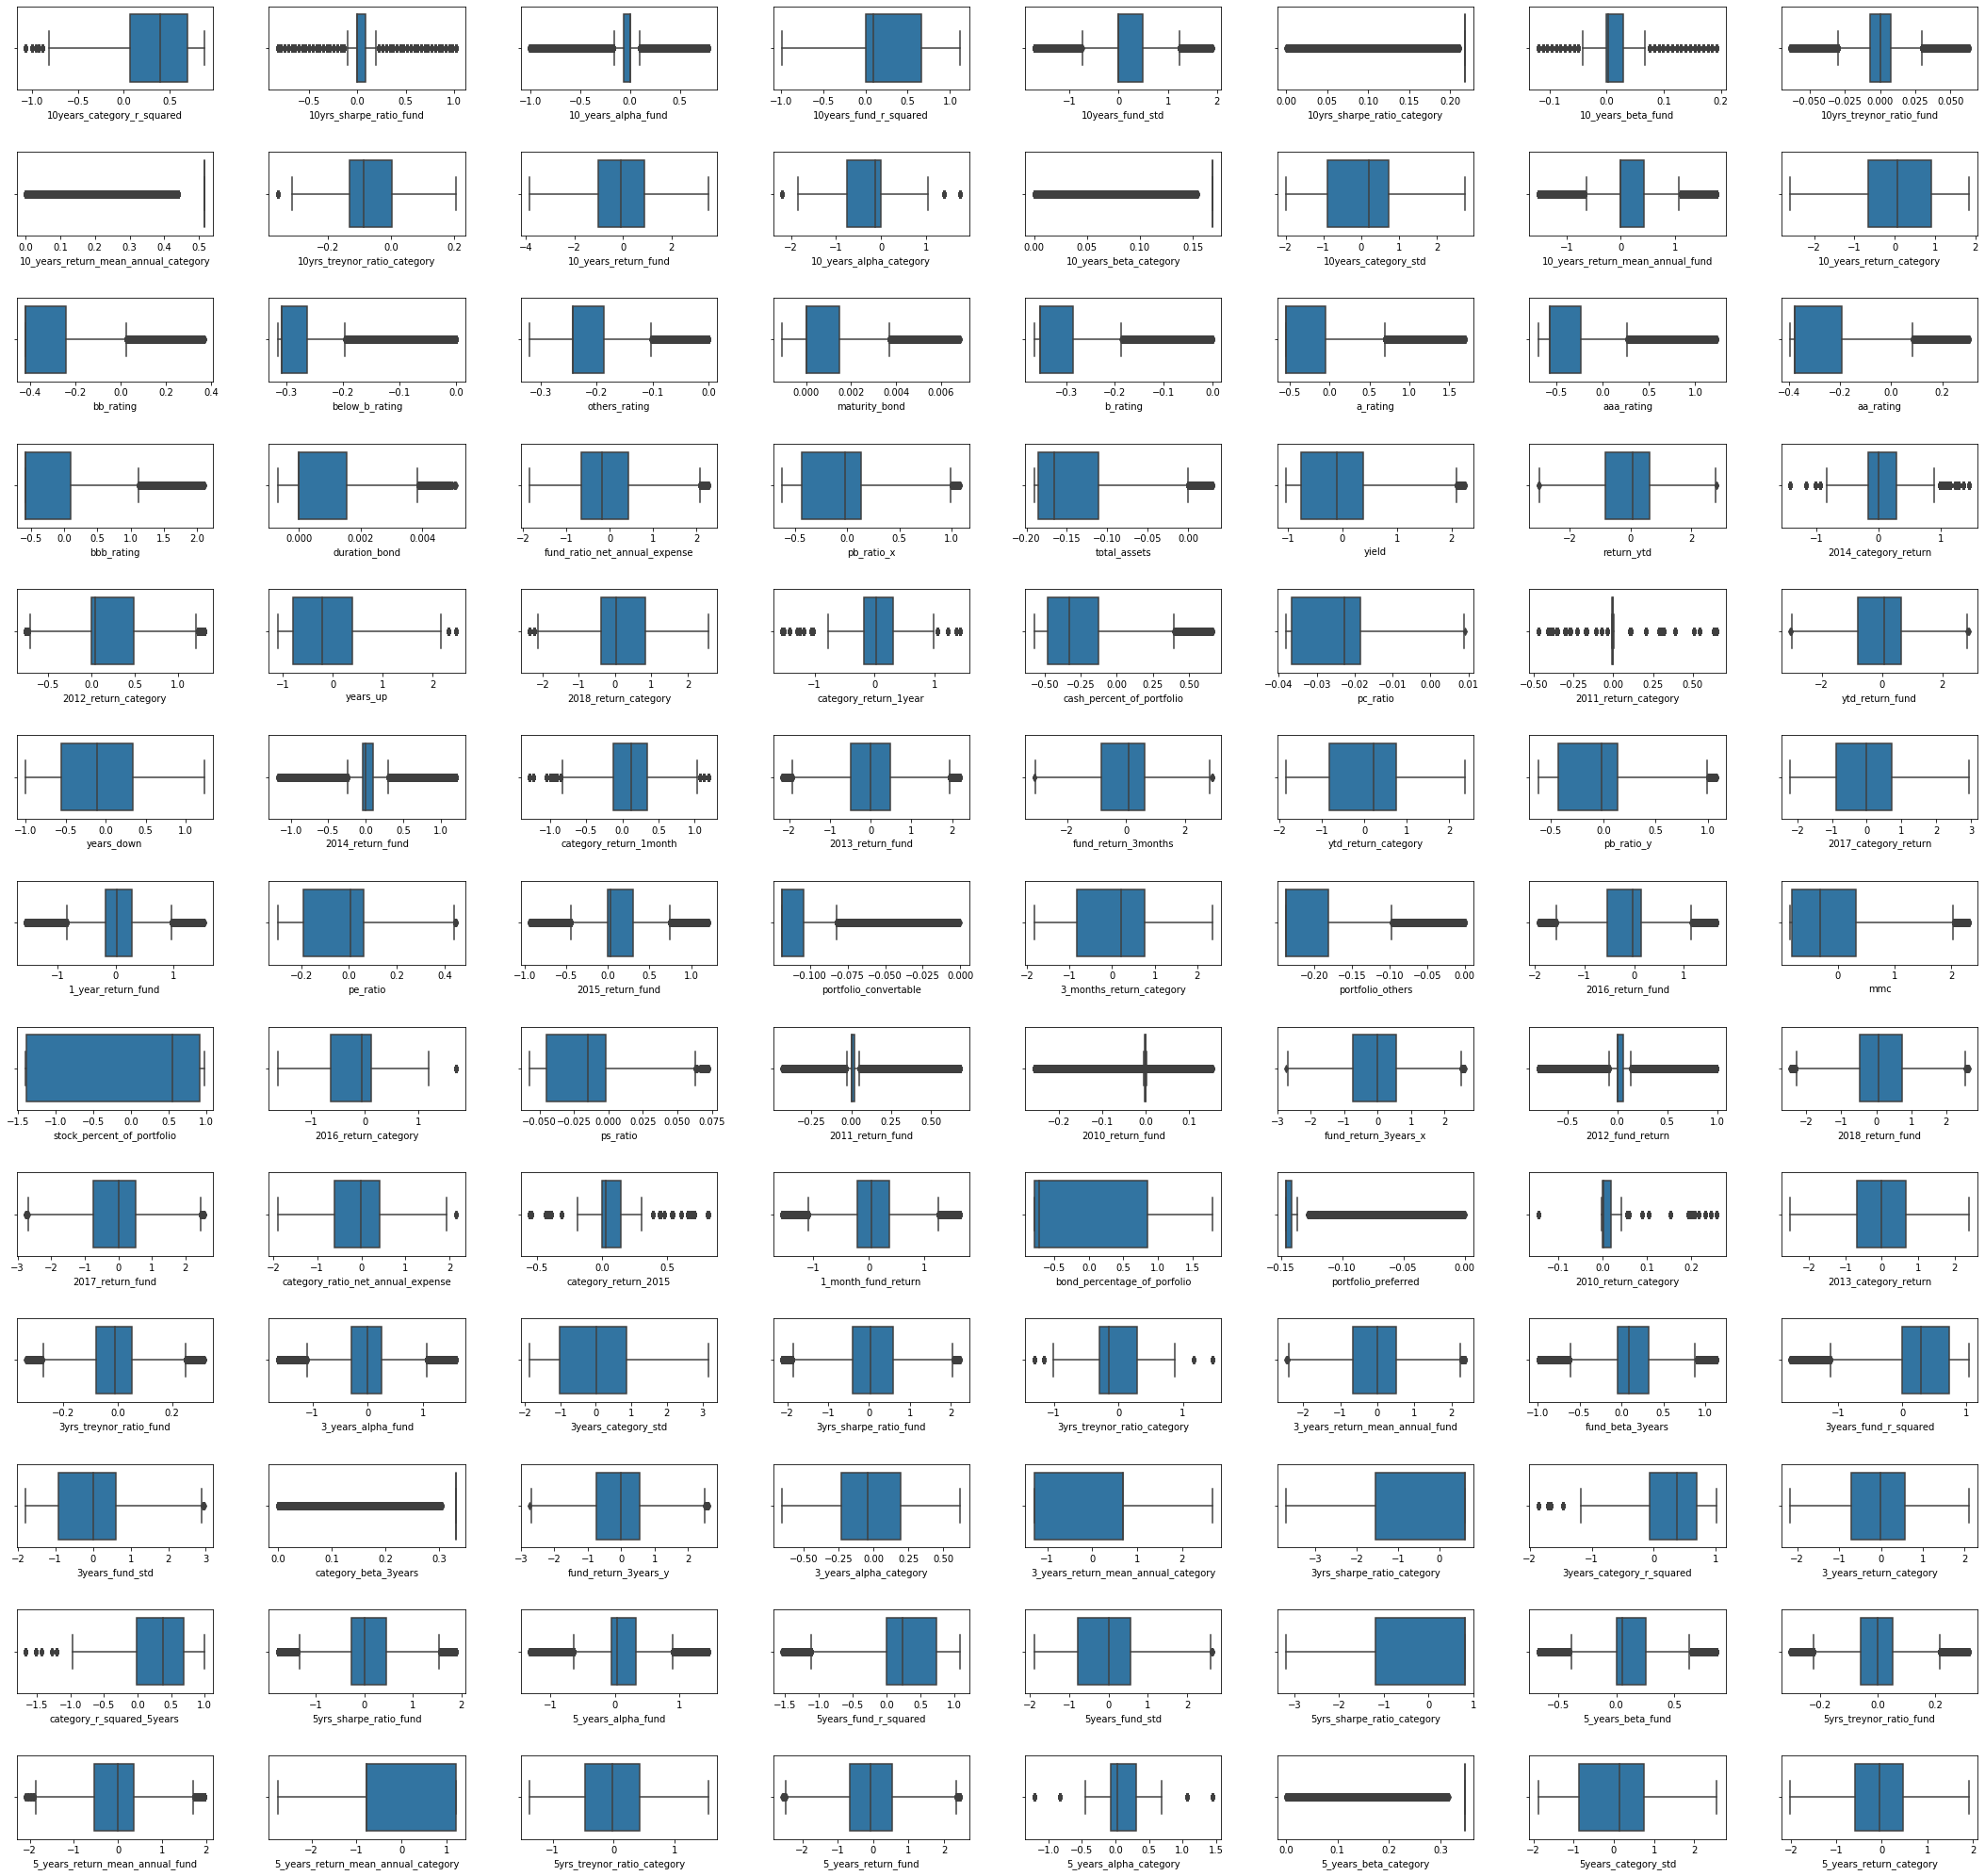

In [72]:
mp.figure(figsize=(30,30))
for i in range(1,len(X_values_scaled.columns)+1):
    mp.subplot(14,8,i)
    mp.tight_layout(pad=3.0)
    sb.boxplot(X_values_scaled[colsX[i-1]])
mp.show

In [73]:
X_values_scaled.shape

(25000, 104)

In [74]:
# dataWithOutliers = colsX
# for attr in dataWithOutliers:
#        for n in range(0,len(X_values_scaled[attr])): 
#              if X_values_scaled[attr][n] < (Q1[attr]-1.5*IQR[attr]) or X_values_scaled[attr][n] > (Q3[attr]+1.5*IQR[attr]):
#                 X_values_scaled[attr][n] = X_values_scaled[attr].mean()

In [75]:
# mp.figure(figsize=(30,30))
# for i in range(1,len(X_values_scaled.columns)+1):
#     mp.subplot(14,8,i)
#     mp.tight_layout(pad=3.0)
#     sb.boxplot(X_values_scaled[colsX[i-1]])
# mp.show

In [76]:
#X_values_scaled.to_csv('complete_dataSet_NN.csv')

In [77]:
X_values_scaled['fund_id'] = dataSet.fund_id

In [78]:
X_values_scaled['greatstone_rating'] = dataSet.greatstone_rating

In [79]:
X_values_scaled.columns

Index(['10years_category_r_squared', '10yrs_sharpe_ratio_fund',
       '10_years_alpha_fund', '10years_fund_r_squared', '10years_fund_std',
       '10yrs_sharpe_ratio_category', '10_years_beta_fund',
       '10yrs_treynor_ratio_fund', '10_years_return_mean_annual_category',
       '10yrs_treynor_ratio_category',
       ...
       '5_years_return_mean_annual_fund',
       '5_years_return_mean_annual_category', '5yrs_treynor_ratio_category',
       '5_years_return_fund', '5_years_alpha_category',
       '5_years_beta_category', '5years_category_std',
       '5_years_return_category', 'fund_id', 'greatstone_rating'],
      dtype='object', length=106)

In [80]:
test_data = pd.read_csv("sample_submission.csv")

test_ids = list(test_data['fund_id'])

test_data_df = pd.DataFrame

test_data_df = pd.DataFrame(columns=X_values_scaled.columns)

test_data_df.fund_id = test_data.fund_id

test_data_df.shape

test_data_df.head()

test_data_df = pd.merge(test_data_df, X_values_scaled, on = 'fund_id', how='left')

X_values_scaled.index = dataSet['fund_id']

test_data_df.head()

test_data_df.shape

test_data_df.dropna(axis=1, inplace = True)
test_data_df.shape

(5000, 106)

In [81]:
test_data_df.to_csv("test_data_NN_full.csv")

In [82]:
# mp.figure(figsize=(30,30))
# for i in range(1,len(X_values_scaled.columns)+1):
#     mp.subplot(14,8,i)
#     mp.tight_layout(pad=3.0)
#     sb.boxplot(X_values_scaled[colsX[i-1]])
# mp.show

In [83]:
for n in test_data_df.fund_id:
    if n in list(X_values_scaled.fund_id):
        X_values_scaled.drop(n,axis = 0, inplace = True)

X_values_scaled.shape

(20000, 106)

In [84]:
X_values_scaled.drop(['fund_id'], axis=1, inplace = True)

In [86]:
#*************************Target Point***********************************#
X_values_scaled.to_csv('complete_dataSet_NN.csv')

In [ ]:
colsX = X_values_scaled.columns

In [ ]:
# mp.figure(figsize=(30,30))
# for i in range(1,len(X_values_scaled.columns)+1):
#     mp.subplot(14,8,i)
#     mp.tight_layout(pad=3.0)
#     sb.distplot(X_values_scaled[colsX[i-1]])
# mp.show

In [ ]:
X_values_scaled.head()

In [ ]:
dataWithOutliers = colsX
for attr in dataWithOutliers:
       for n in range(0,len(X_values_scaled[attr])): 
             if X_values_scaled[attr][n] < (Q1[attr]-1.5*IQR[attr]) or X_values_scaled[attr][n] > (Q3[attr]+1.5*IQR[attr]):
                X_values_scaled[attr][n] = X_values_scaled[attr].mean()    

In [ ]:
mp.figure(figsize=(30,30))
for i in range(1,len(X_values_scaled.columns)+1):
    mp.subplot(14,8,i)
    mp.tight_layout(pad=3.0)
    sb.boxplot(X_values_scaled[colsX[i-1]])
mp.show

In [ ]:
X_values_scaled.to_csv('complete_dataSet_NN.csv')

In [ ]:
cols_to_remove = pd.read_csv('colstoRemove.csv')

In [ ]:
colsRem = cols_to_remove['Cols']

In [ ]:
#X_values_scaled.drop(colsRem, axis =1, inplace = True)

In [ ]:
X_values_scaled.shape

In [ ]:
#indexes = X_values_scaled['fund_id']
#X_values_scaled.drop('fund_id', axis=1, inplace=True)

In [ ]:
#indexes.shape

In [ ]:
#dataSet.corr()

In [ ]:
# def plot_corr(data, size = 20):
#     corr = data.corr()
#     fig, ax = mp.subplots(figsize = (size, size))
#     ax.matshow(corr)
#     mp.xticks(range(len(corr.columns)), corr.columns)
#     mp.yticks(range(len(corr.columns)), corr.columns)
    
# plot_corr(X_values_scaled)

In [ ]:
cov_mat = np.cov(X_values_scaled, rowvar=False)

In [ ]:
cov_mat

In [ ]:
X_values_scaled.corr()

In [ ]:
#X_values_scaled.drop('us_govt_bond_rating', axis=1,inplace = True)
pca = PCA()
pca.fit(X_values_scaled)

In [ ]:
print("The eigen values are: \n", pca.explained_variance_)

In [ ]:
print("The eigen vectors are: \n", pca.components_)

In [ ]:
#-------------------------------------------------------------------------------------------------------------------------#
X_values_scaled.shape

In [ ]:
mp.bar(list(range(0,104)),pca.explained_variance_ratio_,alpha=0.5, align='center' )
mp.ylabel('Variation explained')
mp.xlabel('eigen Value')
mp.show()

In [ ]:
mp.step(list(range(0,104)), np.cumsum(pca.explained_variance_ratio_))
mp.ylabel('Cum of variation explained')
mp.xlabel('eigen Value')
mp.show()

In [ ]:
pca_60 = PCA(n_components=50) #, random_state=1, tol = 0.5

In [ ]:
pca_60

In [ ]:
pca_60.fit(X_values_scaled)

In [ ]:
dataSet_pca60_transformed = pca_60.transform(X_values_scaled)

In [ ]:
dataSet_pca60_transformed = pd.DataFrame(dataSet_pca60_transformed)

In [ ]:
dataSet_pca60_transformed.head(10)

In [ ]:
dataSet_pca60_transformed.shape

In [ ]:
#--------------------------------------------------------------------------------------------------------------------------
dataSet_pca60_transformed['fund_id'] = dataSet['fund_id']
dataSet_pca60_transformed['greatstone_rating'] = dataSet['greatstone_rating']

In [ ]:
dataSet_pca60_transformed.head(5)

In [ ]:
#****Corr here*************#
dataSet_pca60_transformed.corr()

In [ ]:
corr_dataset = dataSet_pca60_transformed.corr()

In [ ]:
corr_dataset.head()

In [ ]:
#corr_dataset.reset_index()

In [ ]:
corr_dataset['greatstone_rating'][0]

In [ ]:
colsToRemove = []

In [ ]:
for n in range(0,40):
    if corr_dataset['greatstone_rating'][n] < 0.05:
        if corr_dataset['greatstone_rating'][n] > -0.05:
          colsToRemove.append(n)

In [ ]:
dataSet_pca60_transformed.drop(colsToRemove, axis=1, inplace = True)

In [ ]:
dataSet_pca60_transformed.corr()

In [ ]:
test_data = pd.read_csv("sample_submission.csv")

test_ids = list(test_data['fund_id'])

test_data_df = pd.DataFrame

In [ ]:
test_data_df = pd.DataFrame(columns=dataSet_pca60_transformed.columns)

test_data_df.fund_id = test_data.fund_id

test_data_df.shape

In [ ]:
test_data_df.head()

In [ ]:
test_data_df = pd.merge(test_data_df, dataSet_pca60_transformed, on = 'fund_id', how='left')

dataSet_pca60_transformed.index = dataSet['fund_id']

test_data_df.head()

test_data_df.shape

In [ ]:
test_data_df.dropna(axis=1, inplace = True)
test_data_df.shape

In [ ]:
test_data_df.head(5)

In [ ]:
test_data_df.drop('greatstone_rating_y', axis=1, inplace = True)

In [ ]:
test_data_df.to_csv('test_data_NN.csv')

In [ ]:
for n in test_data_df.fund_id:
    if n in list(dataSet_pca60_transformed.fund_id):
        dataSet_pca60_transformed.drop(n,axis = 0, inplace = True)

dataSet_pca60_transformed.shape

In [ ]:
dataSet_pca60_transformed.head(5)

In [ ]:
dataSet_pca60_transformed.drop('fund_id', axis = 1, inplace = True)

In [ ]:
dataSet_pca60_transformed.reset_index(inplace=True)

In [ ]:
dataSet_pca60_transformed.head()

In [ ]:
dataSet_pca60_transformed.corr()

In [ ]:
#Y_values = Y_values.reset_index()

In [ ]:
#Y_values.drop('level_0', axis=1,inplace=True)

In [ ]:
#Y_values.head(10)

In [ ]:
#dataSet_pca60_transformed['fund_id'] = indexes

In [ ]:
#dataSet_pca60_transformed = pd.merge(dataSet_pca60_transformed,Y_values,on='fund_id')

In [ ]:
#dataSet_pca60_transformed.head()

In [ ]:
x_val_pca = dataSet_pca60_transformed.drop(['greatstone_rating','fund_id'],axis=1)
#x_val_pca = dataSet_pca60_transformed.drop(['greatstone_rating','index'],axis=1)
y_val_pca = dataSet_pca60_transformed['greatstone_rating']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_val_pca,y_val_pca,test_size = 0.20, random_state = 1)

In [ ]:
rf_classfier = RandomForestClassifier(n_estimators=50,random_state=1)

In [ ]:
rf_classfier.fit(x_train,y_train)

In [ ]:
preds_rf = rf_classfier.predict(x_test)

In [ ]:
x_test.shape

In [ ]:
rf_classfier.score(x_test,y_test)

In [ ]:
grad_classfier = GradientBoostingClassifier()

In [ ]:
grad_classfier.fit(x_train,y_train)

In [ ]:
grad_classfier.score(x_test,y_test)

In [ ]:
def cal_accuracy(test = [], pred = []):
    print ("Accuracy of the model is: " + str(metrics.accuracy_score(test, pred)))

In [ ]:
cal_accuracy(y_test,preds_rf)

In [ ]:
knn_class = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn_class.fit(x_train,y_train)

In [ ]:
knn_class.score(x_test,y_test)

In [ ]:
rf_classfier_tuned = RandomForestClassifier()

In [ ]:
##Parameter Tuning
parameters_map = {'bootstrap':[True, False],'max_depth':[5,None],'max_features':randint(1,6),
                  'max_leaf_nodes':randint(2,6),'min_samples_split': randint(2,6),
                  'min_samples_leaf': randint(1,6),'random_state':randint(1,6), 'n_estimators':randint(10,800)
                  }

In [ ]:
#random_cv_RF = RandomizedSearchCV(rf_classfier_tuned, param_distributions=parameters_map, n_iter=50,cv=40)

In [ ]:
#random_cv_RF.fit(x_train,y_train)

In [ ]:
#random_cv_RF.score(x_test,y_test)

In [ ]:
param_grid = {"max_depth": [3,None],
              "max_features": [1, 3, 6],
              "min_samples_split": [2, 3, 6],
              "min_samples_leaf": [1, 3, 6],
              "bootstrap": [True, False]}

grid_search = GridSearchCV(rf_classfier, param_grid=param_grid)
grid_search.fit(x_train, y_train)

In [ ]:
grid_search.score(x_test,y_test)

# =============================================================

In [ ]:
test_data_df.head()

In [ ]:
test_data_df.drop('fund_id', axis = 1, inplace = True)

In [ ]:
test_data_df.shape

In [ ]:
preds = rf_classfier.predict(test_data_df)

In [ ]:
test_data['greatstone_rating'] = preds

In [ ]:
test_data.to_csv("C:\\Users\\vipul\\AIML Projects\\Practice Lab\\GL_Hackathon\\Hackathon_Files\\external\\Submission5.csv")

In [ ]:
preds_knn = knn_class.predict(test_data_df)

In [ ]:
test_data['greatstone_rating'] = preds
test_data.to_csv("C:\\Users\\vipul\\AIML Projects\\Practice Lab\\GL_Hackathon\\Hackathon_Files\\external\\Submission3.csv")

In [ ]:
preds_randm_cv = random_cv_RF.predict(test_data_df)
test_data['greatstone_rating'] = preds
test_data.to_csv("C:\\Users\\vipul\\AIML Projects\\Practice Lab\\GL_Hackathon\\Hackathon_Files\\external\\Submission4.csv")

In [ ]:
preds_grid_cv = grid_search.predict(test_data_df)
test_data['greatstone_rating'] = preds_grid_cv
test_data.to_csv("C:\\Users\\vipul\\AIML Projects\\Practice Lab\\GL_Hackathon\\Hackathon_Files\\external\\Submission6.csv")

In [ ]:
test_data_df.head()
test_data_df.drop('fund_id', axis = 1, inplace = True)
test_data_df.shape
preds = rf_classfier.predict(test_data_df)
test_data['greatstone_rating'] = preds
test_data.to_csv("C:\\Users\\vipul\\AIML Projects\\Practice Lab\\GL_Hackathon\\Hackathon_Files\\external\\Submission7.csv")

In [ ]:
test_data_df.head()
test_data_df.drop('fund_id', axis = 1, inplace = True)
test_data_df.shape
preds = rf_classfier.predict(test_data_df)
test_data['greatstone_rating'] = preds
test_data.to_csv("C:\\Users\\vipul\\AIML Projects\\Practice Lab\\GL_Hackathon\\Hackathon_Files\\external\\Submission8.csv")

In [ ]:
test_data_df.head()
test_data_df.drop('fund_id', axis = 1, inplace = True)
test_data_df.shape
preds = rf_classfier.predict(test_data_df)
test_data['greatstone_rating'] = preds
test_data.to_csv("C:\\Users\\vipul\\AIML Projects\\Practice Lab\\GL_Hackathon\\Hackathon_Files\\external\\Submission9.csv")

In [ ]:
test_data_df.head()
test_data_df.drop('fund_id', axis = 1, inplace = True)
test_data_df.shape
preds = rf_classfier.predict(test_data_df)
test_data['greatstone_rating'] = preds
test_data.to_csv("C:\\Users\\vipul\\AIML Projects\\Practice Lab\\GL_Hackathon\\Hackathon_Files\\external\\Submission10.csv")